In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('netflix_titles.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
data.shape

(7787, 12)

### 뽑아낼 데이터
- tv movie 비율 정리
- 감독별 작품 정리
- rating
- country별로 작품정리

In [14]:
type_data=data['type'].value_counts()
type_data

Movie      5377
TV Show    2410
Name: type, dtype: int64

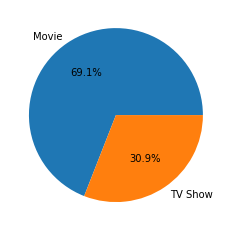

In [20]:
#원형그래프 그리기
plt.plot(figsize=(20,10))
plt.pie(type_data,labels=type_data.index,autopct="%.1f%%")
plt.show()

In [23]:
#rating

rate=data['rating'].value_counts()
rate

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

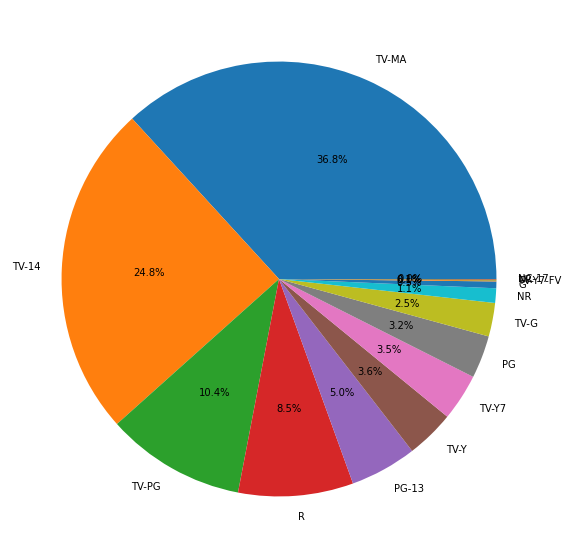

In [24]:
plt.figure(figsize=(20,10))
plt.pie(rate,labels=rate.index,autopct="%.1f%%")
plt.show()

In [41]:
#나라별로 작품 정리

country=data['country'].value_counts()[:10].sort_values(ascending=True)
country

Turkey             100
Egypt              101
France             115
Spain              134
Canada             177
South Korea        183
Japan              226
United Kingdom     397
India              923
United States     2555
Name: country, dtype: int64

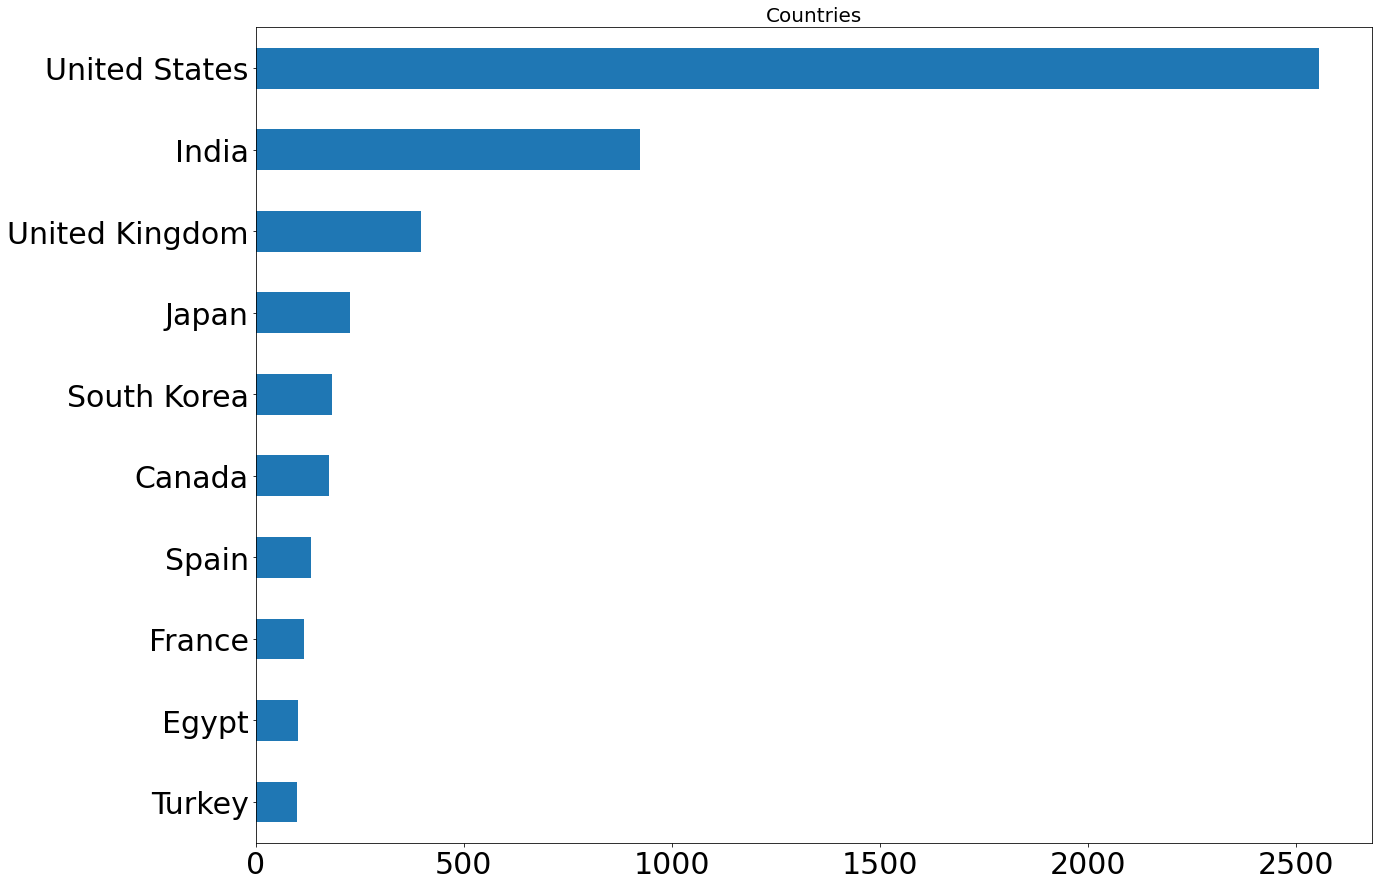

In [54]:
country.plot.barh(figsize=(20,15))
plt.title("Countries",fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [59]:
#감독 작품 뽑아내기
director=data['director'].value_counts()[:10].sort_values(ascending=True)
director

Ryan Polito                8
David Dhawan               9
Steven Spielberg          10
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Cathy Garcia-Molina       13
Jay Karas                 14
Marcus Raboy              16
Raúl Campos, Jan Suter    18
Name: director, dtype: int64

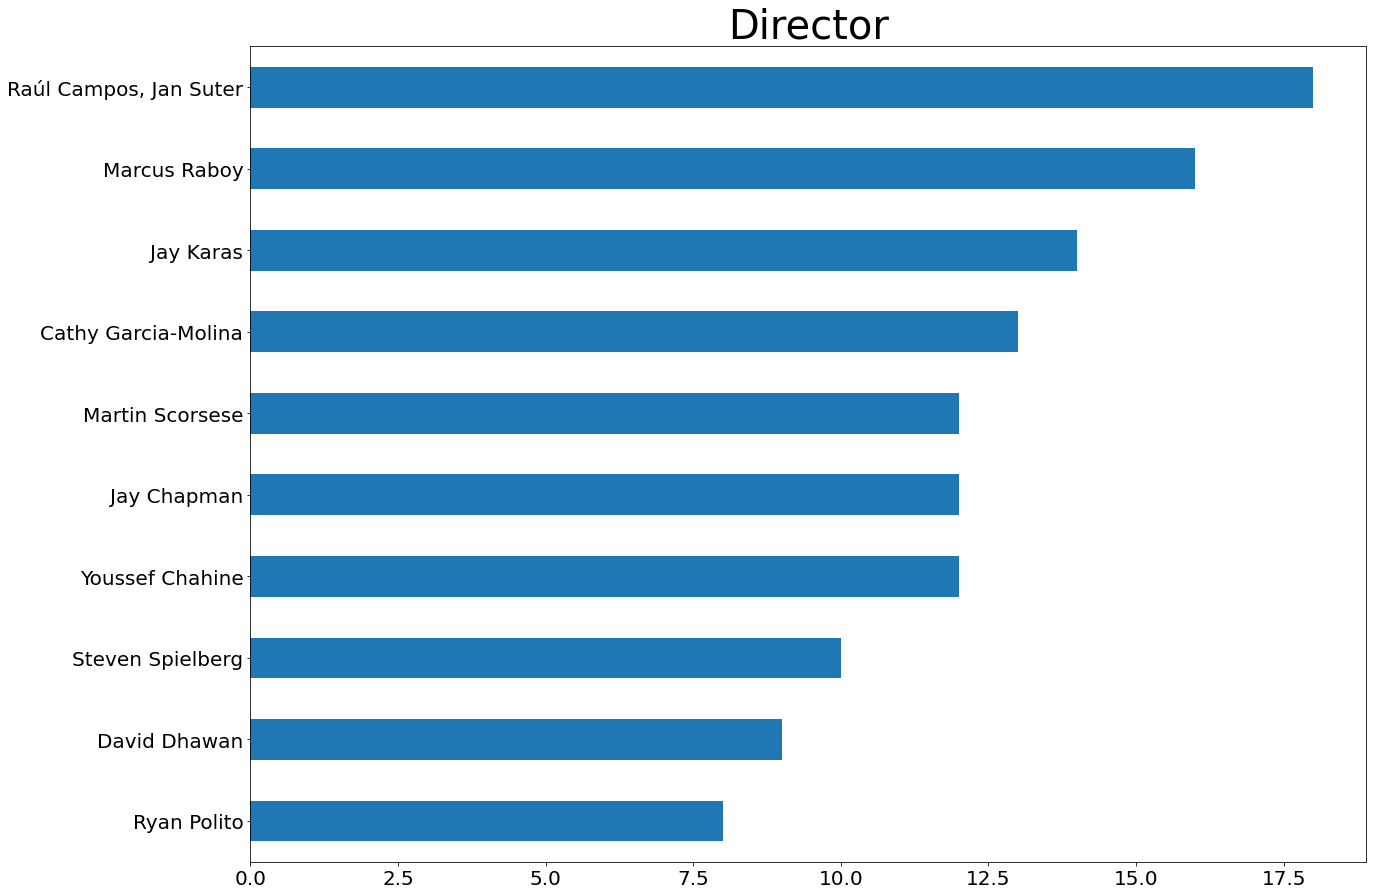

In [65]:
director.plot.barh(figsize=(20,15))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Director',fontsize=40)
plt.show()

In [100]:
Korea_data=data[data['country']=='South Korea']
Korea_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ..."
51,s52,TV Show,100 Days My Prince,NaN,"Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...",South Korea,"December 7, 2020",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Upon losing his memory, a crown prince encount..."
61,s62,TV Show,12 Years Promise,NaN,"So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...",South Korea,"May 22, 2017",2014,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A pregnant teen is forced by her family to lea...
81,s82,Movie,2015 Dream Concert,NaN,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...",South Korea,"April 28, 2017",2015,TV-PG,107 min,"International Movies, Music & Musicals",The world's biggest K-pop festival marked its ...
91,s92,Movie,26 Years,Geun-hyun Cho,"Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im...",South Korea,"October 1, 2017",2012,TV-MA,135 min,"Dramas, International Movies, Thrillers",Twenty-six years after the 1980 massacre at Gw...
...,...,...,...,...,...,...,...,...,...,...,...,...
7583,s7584,TV Show,When the Camellia Blooms,NaN,"Kong Hyo-jin, Kang Ha-neul, Kim Ji-seok, Oh Ju...",South Korea,"September 18, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Dongbaek is a single mother. When a potential ...
7601,s7602,TV Show,White Nights,NaN,"Yo-Won Lee, Goo Jin, U-ie, Hae-in Jung, Gook-h...",South Korea,"February 14, 2017",2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, TV Dr...","A coldhearted heiress, a man from her past and..."
7711,s7712,TV Show,YG Future Strategy Office,NaN,"Seungri, Yoo Byung Jae, Lee Jai-jin, Jinu, Son...",South Korea,"October 5, 2018",2018,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Co...","K-pop star Seungri, BIGBANG's youngest member,..."
7718,s7719,Movie,Yoo Byung Jae: Discomfort Zone,Y. Joon Chung,Yoo Byung Jae,South Korea,"August 17, 2018",2018,TV-MA,54 min,Stand-Up Comedy,Daring comedian Yoo Byung-jae connects critici...


In [102]:
Korea_data.isnull().sum()

show_id           0
type              0
title             0
director        139
cast              3
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [105]:
Korea_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 27 to 7720
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       183 non-null    object
 1   type          183 non-null    object
 2   title         183 non-null    object
 3   director      44 non-null     object
 4   cast          180 non-null    object
 5   country       183 non-null    object
 6   date_added    183 non-null    object
 7   release_year  183 non-null    int64 
 8   rating        183 non-null    object
 9   duration      183 non-null    object
 10  listed_in     183 non-null    object
 11  description   183 non-null    object
dtypes: int64(1), object(11)
memory usage: 18.6+ KB


#### 넷플릭스에 올라간 한국 작품의 개수는 183개

In [107]:
#tv.drama 분리하기
Korea_type=Korea_data['type'].value_counts()
Korea_type

TV Show    147
Movie       36
Name: type, dtype: int64

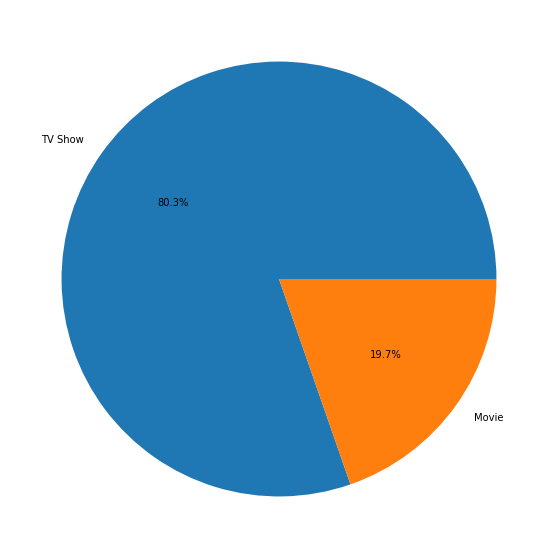

In [114]:
#한국의 작품 중 TV show와 movie의 비율
plt.figure(figsize=(10,10))
plt.pie(Korea_type,labels=Korea_type.index,autopct="%.1f%%")
plt.show()

In [115]:
#감독의 작품 정리
Korea_director=Korea_data['director'].value_counts()[:10]
Korea_director
#굳이 그래프화 필요없을 듯

Shin Won-ho        2
Sang-ho Yeon       2
Ahn Byoung-wook    1
Lee Eung-bok       1
Na Hyeon           1
Woo Min-ho         1
Park Joon-hwa      1
Kim Sung-hoon      1
Geun-hyun Cho      1
Jang Jae-hyun      1
Name: director, dtype: int64

In [118]:
#release year 구하기
Korea_release=Korea_data['release_year'].value_counts().sort_index()
Korea_release

2004     1
2009     3
2010     2
2011     1
2012    11
2013     5
2014     8
2015    12
2016    28
2017    31
2018    28
2019    22
2020    30
2021     1
Name: release_year, dtype: int64

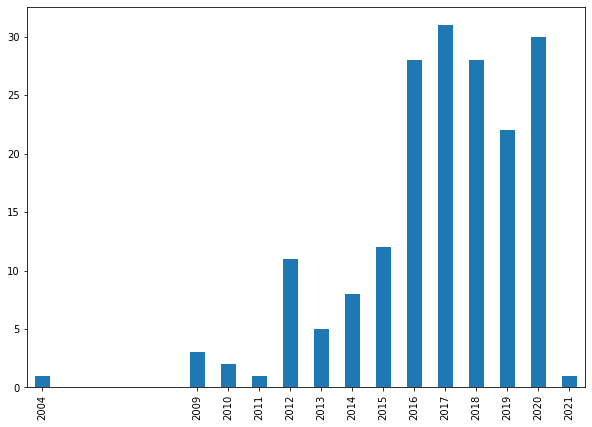

In [121]:
Korea_release.plot.bar(figsize=(10,7))
plt.xticks(fontsize=13,)
plt.show()

In [122]:
Korea_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ..."
51,s52,TV Show,100 Days My Prince,NaN,"Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...",South Korea,"December 7, 2020",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Upon losing his memory, a crown prince encount..."
61,s62,TV Show,12 Years Promise,NaN,"So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...",South Korea,"May 22, 2017",2014,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A pregnant teen is forced by her family to lea...
81,s82,Movie,2015 Dream Concert,NaN,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...",South Korea,"April 28, 2017",2015,TV-PG,107 min,"International Movies, Music & Musicals",The world's biggest K-pop festival marked its ...
91,s92,Movie,26 Years,Geun-hyun Cho,"Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im...",South Korea,"October 1, 2017",2012,TV-MA,135 min,"Dramas, International Movies, Thrillers",Twenty-six years after the 1980 massacre at Gw...
...,...,...,...,...,...,...,...,...,...,...,...,...
7583,s7584,TV Show,When the Camellia Blooms,NaN,"Kong Hyo-jin, Kang Ha-neul, Kim Ji-seok, Oh Ju...",South Korea,"September 18, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Dongbaek is a single mother. When a potential ...
7601,s7602,TV Show,White Nights,NaN,"Yo-Won Lee, Goo Jin, U-ie, Hae-in Jung, Gook-h...",South Korea,"February 14, 2017",2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, TV Dr...","A coldhearted heiress, a man from her past and..."
7711,s7712,TV Show,YG Future Strategy Office,NaN,"Seungri, Yoo Byung Jae, Lee Jai-jin, Jinu, Son...",South Korea,"October 5, 2018",2018,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Co...","K-pop star Seungri, BIGBANG's youngest member,..."
7718,s7719,Movie,Yoo Byung Jae: Discomfort Zone,Y. Joon Chung,Yoo Byung Jae,South Korea,"August 17, 2018",2018,TV-MA,54 min,Stand-Up Comedy,Daring comedian Yoo Byung-jae connects critici...


In [124]:
Korea_2020=Korea_data[Korea_data['release_year']==2020]
Korea_2020


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ..."
199,s200,TV Show,A Love So Beautiful,NaN,"Kim Yo-han, So Joo-yeon, Yeo Hoi-hyun, Jeong J...",South Korea,"December 28, 2020",2020,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Love is as tough as it is sweet for a lovestru...
1789,s1790,TV Show,Do Do Sol Sol La La Sol,NaN,"Go A-ra, Lee Jae-wook, Kim Ju-hun, Ye Ji-won, ...",South Korea,"October 8, 2020",2020,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A riches-to-rags pianist who loses everything ...
2072,s2073,TV Show,Extracurricular,NaN,"Kim Dong-hee, Jung Da-bin, Park Ju-hyun, Nam Y...",South Korea,"April 29, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Korean...",A model high school student who's steeped in a...
2461,s2462,TV Show,Goedam,Hong Won-ki,"SEOLA, Lee Hyun-joo, Song Chae-yun, Han Ga-rim...",South Korea,"August 20, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Horror, TV Mysteries","When night falls on the city, shadows and spir..."
2509,s2510,TV Show,Graceful Friends,NaN,"Yu Jun-sang, Song Yoon-a, Bae Soo-bin, Kim Sun...",South Korea,"November 12, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",When a sudden death brings everyone’s dirty se...
2714,s2715,TV Show,"Hi Bye, Mama!",NaN,"Kim Tae-hee, Lee Kyoo-hyung, Go Bo-gyeol, Shin...",South Korea,"February 23, 2020",2020,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",When the ghost of a woman gains a second chanc...
2813,s2814,TV Show,Hospital Playlist,NaN,"Cho Jung-seok, Yoo Yeon-seok, Jung Kyung-ho, K...",South Korea,"March 12, 2020",2020,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Co...",Every day is extraordinary for five doctors an...
2879,s2880,TV Show,Hyena,NaN,"Kim Hye-soo, Ju Ji-hoon, Lee Gyoung-young, Kim...",South Korea,"February 21, 2020",2020,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Roman...","To survive in a dog-eat-dog world, two rival l..."
3081,s3082,TV Show,It's Okay to Not Be Okay,NaN,"Kim Soo-hyun, Seo Yea-ji, Oh Jung-se, Park Gyu...",South Korea,"June 21, 2020",2020,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Roman...",An extraordinary road to emotional healing ope...
